In [2]:
import pandas as pd
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
#from sklearn.externals import joblib

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

In [5]:
df = pd.read_csv('/content/drive/MyDrive/PROJET 3/INFO MALADIE/DF/df_nettoyer/df_liver_M0F1 .csv')

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df['Dataset'].value_counts()

1    402
0    162
Name: Dataset, dtype: int64

In [6]:
# Test sain
print(df[df['Dataset'] == 0].head(1))

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
8   17       0              0.9               0.3                   202   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
8                        22                          19             7.4   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
8      4.1                         1.2        0  


In [8]:
# Test malade
print(df[df['Dataset'] == 1].head(2))

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       1              0.7               0.1                   187   
1   62       0             10.9               5.5                   699   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  


In [ ]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,44.872340,0.244681,3.120177,1.490248,291.292553,74.664894,96.319149,6.495390,3.146631,0.948174,0.712766
std,16.270406,0.430279,5.243313,2.834354,243.913762,155.725254,172.489836,1.088718,0.796511,0.319301,0.452873
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.250000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,32.600000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


***1.1 RANDOM FOREST CLASSIFIER SIMPLE***

In [ ]:
feature_columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
predicted_class = 'Dataset'

In [ ]:
X = df[feature_columns].values
y = df[predicted_class].values

In [ ]:
X_rff0_train, X_rff0_test, y_rff0_train, y_rff0_test = train_test_split(X, y, test_size = 0.35, random_state=42)
random_forest_model_rff0 = RandomForestClassifier(random_state = 42)
random_forest_model_rff0.fit(X_rff0_train, y_rff0_train)

RandomForestClassifier(random_state=42)

In [ ]:
train_score_rff0 = random_forest_model_rff0.score(X_rff0_train, y_rff0_train)
test_score_rff0 = random_forest_model_rff0.score(X_rff0_test, y_rff0_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_rff0*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_rff0*100:.2f}%")

- Le score pour le jeu d'entrainement est : 100.00%
- Le score pour le jeu de test est : 74.24%


In [ ]:
predict_train_data_rff0 = random_forest_model_rff0.predict(X_rff0_test)
report_rff0 = classification_report(y_rff0_test, predict_train_data_rff0, output_dict = True)
df_report_rff0 = pd.DataFrame(report_rff0).transpose()
df_report_rff0

,precision,recall,f1-score,support
0,0.531250,0.320755,0.400000,53.000000
1,0.783133,0.896552,0.836013,145.000000
accuracy,0.742424,0.742424,0.742424,0.742424
macro avg,0.657191,0.608653,0.618006,198.000000
weighted avg,0.715709,0.742424,0.719302,198.000000


In [ ]:
cm_rff0 = confusion_matrix(y_rff0_test, predict_train_data_rff0)
df_confusion_rff0 = pd.DataFrame(cm_rff0, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_rff0

,Prédit Sain,Prédit Malade
Réel Sain,17,36
Réel Malade,15,130


Les résultats ne sont pas équilibrés.

***1.2 RANDOM FOREST CLASSIFIER AVEC STANDARD SCALER - NON RETENU***

In [ ]:
X_rff_train, X_rff_test, y_rff_train, y_rff_test = train_test_split(X, y, test_size = 0.35, random_state=42)

In [ ]:
scaler_rff = StandardScaler()
X_rff_train_scaled = scaler_rff.fit_transform(X_rff_train)

In [ ]:
X_rff_test_scaled = scaler_rff.transform(X_rff_test)

In [ ]:
random_forest_model_rff = RandomForestClassifier(random_state = 42)
random_forest_model_rff.fit(X_rff_train_scaled, y_rff_train)

RandomForestClassifier(random_state=42)

In [ ]:
train_score_rff = random_forest_model_rff.score(X_rff_train_scaled, y_rff_train)
test_score_rff = random_forest_model_rff.score(X_rff_test_scaled, y_rff_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_rff*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_rff*100:.2f}%")

- Le score pour le jeu d'entrainement est : 100.00%
- Le score pour le jeu de test est : 74.75%


In [ ]:
predict_train_data_rff = random_forest_model_rff.predict(X_rff_test)
report_rff = classification_report(y_rff_test, predict_train_data_rff, output_dict = True)
df_report_rff = pd.DataFrame(report_rff).transpose()
df_report_rff

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,53.000000
1,0.732323,1.000000,0.845481,145.000000
accuracy,0.732323,0.732323,0.732323,0.732323
macro avg,0.366162,0.500000,0.422741,198.000000
weighted avg,0.536297,0.732323,0.619165,198.000000


In [ ]:
cm_rff = confusion_matrix(y_rff_test, predict_train_data_rff)
df_confusion_rff = pd.DataFrame(cm_rff, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_rff

,Prédit Sain,Prédit Malade
Réel Sain,0,53
Réel Malade,0,145


Modèle totalement déséquilibré.

***1.3 RANDOM FOREST CLASSIFIER AVEC CLASS WEIGHTS***

In [ ]:
X_rff2_train, X_rff2_test, y_rff2_train, y_rff2_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [ ]:
# Calculer le poids pour la classe 0
weight_0 = len(y_rff2_train) / (2 * np.bincount(y_rff2_train)[0])
# Calculer le poids pour la classe 1
weight_1 = len(y_rff2_train) / (2 * np.bincount(y_rff2_train)[1])

# Créer un dictionnaire de poids de classe
class_weights = {0: weight_0, 1: weight_1}

In [ ]:
random_forest_model_rff2 = RandomForestClassifier(class_weight = class_weights, random_state = 42)
random_forest_model_rff2.fit(X_rff2_train, y_rff2_train)

RandomForestClassifier(class_weight={0: 1.723021582733813,
                                     1: 0.7044117647058824},
                       random_state=42)

In [ ]:
train_score_rff2 = random_forest_model_rff2.score(X_rff2_train, y_rff2_train)
test_score_rff2 = random_forest_model_rff2.score(X_rff2_test, y_rff2_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_rff2*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_rff2*100:.2f}%")

- Le score pour le jeu d'entrainement est : 100.00%
- Le score pour le jeu de test est : 81.18%


In [ ]:
predict_train_data_rff2 = random_forest_model_rff2.predict(X_rff2_test)
report_rff2 = classification_report(y_rff2_test, predict_train_data_rff2, output_dict = True)
df_report_rff2 = pd.DataFrame(report_rff2).transpose()
df_report_rff2

,precision,recall,f1-score,support
0,0.733333,0.478261,0.578947,23.000000
1,0.828571,0.935484,0.878788,62.000000
accuracy,0.811765,0.811765,0.811765,0.811765
macro avg,0.780952,0.706872,0.728868,85.000000
weighted avg,0.802801,0.811765,0.797655,85.000000


In [ ]:
cm_rff2 = confusion_matrix(y_rff2_test, predict_train_data_rff2)
df_confusion_rff2 = pd.DataFrame(cm_rff2, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_rff2

,Prédit Sain,Prédit Malade
Réel Sain,11,12
Réel Malade,4,58


Les résultats ne sont pas équilibrés.

***1.4 RANDOM FOREST AVEC SMOTE - 402 POUR CHAQUE CLASSE ET PIPELINE***

In [ ]:
random_state = 42

In [ ]:
X_rff3_train, X_rff3_test, y_rff3_train, y_rff3_test = train_test_split(X, y, test_size = 0.38, random_state=random_state)

In [ ]:
sampling_strategy = {0 : 402, 1 : 402}

In [ ]:
pipeline_rff3 = make_pipeline(SMOTE(sampling_strategy = sampling_strategy, random_state = random_state), RandomForestClassifier(random_state = random_state))

In [ ]:
pipeline_rff3.fit(X_rff3_train, y_rff3_train)

Pipeline(steps=[('smote',
                 SMOTE(random_state=42, sampling_strategy={0: 402, 1: 402})),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
cv_scores_rff3 = cross_val_score(pipeline_rff3, X_rff3_train, y_rff3_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores_rff3)
print("Mean CV score:", cv_scores_rff3.mean())

Cross-validation scores: [0.58571429 0.65714286 0.74285714 0.64285714 0.68115942]
Mean CV score: 0.6619461697722567


In [ ]:
predict_train_data_rff3_pip = cross_val_predict(pipeline_rff3, X_rff3_train, y_rff3_train, cv=10)
report_rff3 = classification_report(y_rff3_train, predict_train_data_rff3_pip, output_dict = True)
df_report_rff3 = pd.DataFrame(report_rff3).transpose()
df_report_rff3

,precision,recall,f1-score,support
0,0.433333,0.500000,0.464286,104.00000
1,0.772926,0.722449,0.746835,245.00000
accuracy,0.656160,0.656160,0.656160,0.65616
macro avg,0.603130,0.611224,0.605561,349.00000
weighted avg,0.671729,0.656160,0.662637,349.00000


In [ ]:
cm_rff3 = confusion_matrix(y_rff3_train, predict_train_data_rff3_pip)
df_confusion_rff3 = pd.DataFrame(cm_rff3, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_rff3

,Prédit Sain,Prédit Malade
Réel Sain,52,52
Réel Malade,68,177


Les résultats ne sont pas équilibrés.

***1.5 RANDOM FOREST AVEC SMOTE - 299 POUR CHAQUE CLASSE ET PIPELINE***

In [ ]:
random_state = 42

In [ ]:
X_rff4_train, X_rff4_test, y_rff4_train, y_rff4_test = train_test_split(X, y, test_size = 0.25, random_state=random_state)

In [ ]:
sampling_strategy = {0 : 299, 1 : 299}

In [ ]:
pipeline_rff4 = make_pipeline(SMOTE(sampling_strategy = sampling_strategy, random_state = random_state), RandomForestClassifier(random_state = random_state))

In [ ]:
pipeline_rff4.fit(X_rff4_train, y_rff4_train)

Pipeline(steps=[('smote',
                 SMOTE(random_state=42, sampling_strategy={0: 299, 1: 299})),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
cv_scores_rff4 = cross_val_score(pipeline_rff4, X_rff4_train, y_rff4_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores_rff4)
print("Mean CV score:", cv_scores_rff4.mean())

Cross-validation scores: [0.62352941 0.61176471 0.70588235 0.5952381  0.58333333]
Mean CV score: 0.6239495798319329


In [ ]:
predict_train_data_rff4_pip = cross_val_predict(pipeline_rff4, X_rff4_train, y_rff4_train, cv=10)
report_rff4 = classification_report(y_rff4_train, predict_train_data_rff4_pip, output_dict = True)
df_report_rff4 = pd.DataFrame(report_rff4).transpose()
df_report_rff4

,precision,recall,f1-score,support
0,0.370079,0.379032,0.374502,124.000000
1,0.739865,0.732441,0.736134,299.000000
accuracy,0.628842,0.628842,0.628842,0.628842
macro avg,0.554972,0.555737,0.555318,423.000000
weighted avg,0.631464,0.628842,0.630124,423.000000


In [ ]:
cm_rff4 = confusion_matrix(y_rff4_train, predict_train_data_rff4_pip)
df_confusion_rff4 = pd.DataFrame(cm_rff4, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_rff4

,Prédit Sain,Prédit Malade
Réel Sain,47,77
Réel Malade,80,219


Les résultats ne sont pas équilibrés.

***1.6 RANDOM FOREST AVEC SMOTE - 400 POUR CHAQUE CLASSE SUR LE JEU D'ENTRAINEMENT***

In [ ]:
random_state = 42

In [ ]:
test_size = 0.25

In [ ]:
X_rff5_train, X_rff5_test, y_rff5_train, y_rff5_test = train_test_split(X, y, test_size = test_size, random_state=random_state)

In [ ]:
sampling_strategy = {0 : 400, 1 : 400}

In [ ]:
X_rff5_resampled, y_rff5_resampled = SMOTE(sampling_strategy = sampling_strategy).fit_resample(X_rff5_train, y_rff5_train)

In [ ]:
random_forest_model_rff5 = RandomForestClassifier(random_state = random_state)
random_forest_model_rff5.fit(X_rff5_resampled, y_rff5_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [ ]:
# Effectuer une validation croisée
cv_scores_rff5 = cross_val_score(random_forest_model_rff5, X_rff5_resampled, y_rff5_resampled, cv=cv5)
print("Cross-validation scores:", cv_scores_rff5)
print("Mean CV score:", cv_scores_rff5.mean())

Cross-validation scores: [0.81875 0.8375  0.8375  0.81875 0.8    ]
Mean CV score: 0.8225


In [ ]:
predict_train_data_rff5_cv = cross_val_predict(random_forest_model_rff5, X_rff5_resampled, y_rff5_resampled, cv=cv5)
report_rff5 = classification_report(y_rff5_resampled, predict_train_data_rff5_cv, output_dict = True)
df_report_rff5 = pd.DataFrame(report_rff5).transpose()
df_report_rff5

,precision,recall,f1-score,support
0,0.789238,0.8800,0.832151,400.0000
1,0.864407,0.7650,0.811671,400.0000
accuracy,0.822500,0.8225,0.822500,0.8225
macro avg,0.826822,0.8225,0.821911,800.0000
weighted avg,0.826822,0.8225,0.821911,800.0000


In [ ]:
cm_rff5 = confusion_matrix(y_rff5_resampled, predict_train_data_rff5_cv)
df_confusion_rff5 = pd.DataFrame(cm_rff5, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_rff5

,Prédit Sain,Prédit Malade
Réel Sain,352,48
Réel Malade,94,306


Les résultats sont plutôt concluants.

***1.6 RANDOM FOREST CLASSIFIER AVEC MIN_WEIGHT_FRACTION_LEAF***

In [ ]:
X_rff5_train, X_rff5_test, y_rff5_train, y_rff5_test = train_test_split(X, y, test_size = 0.25, random_state=random_state)

In [ ]:
random_forest_model_rff5 = RandomForestClassifier(random_state = random_state)
random_forest_model_rff5.fit(X_rff5_train, y_rff5_train)

RandomForestClassifier(min_weight_fraction_leaf=0.05, random_state=42)

In [ ]:
train_score_rff5 = random_forest_model_rff5.score(X_rff5_train, y_rff5_train)
test_score_rff5 = random_forest_model_rff5.score(X_rff5_test, y_rff5_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_rff5*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_rff5*100:.2f}%")

- Le score pour le jeu d'entrainement est : 79.60%
- Le score pour le jeu de test est : 72.57%


In [ ]:
predict_train_data_rff5 = random_forest_model_rff5.predict(X_rff5_test)
report_rff5 = classification_report(y_rff5_test, predict_train_data_rff5, output_dict = True)
df_report_rff5 = pd.DataFrame(report_rff5).transpose()
df_report_rff5

,precision,recall,f1-score,support
0,0.533333,0.250000,0.340426,32.000000
1,0.755102,0.913580,0.826816,81.000000
accuracy,0.725664,0.725664,0.725664,0.725664
macro avg,0.644218,0.581790,0.583621,113.000000
weighted avg,0.692300,0.725664,0.689077,113.000000


In [ ]:
cm_rff5 = confusion_matrix(y_rff5_test, predict_train_data_rff5)
df_confusion_rff5 = pd.DataFrame(cm_rff5, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_rff5

,Prédit Sain,Prédit Malade
Réel Sain,8,24
Réel Malade,7,74


Les résultats ne sont pas équilibrés.

***1.7 RANDOM FOREST CLASSIFIER AVEC UN DATAFRAME REEQUILIBRE PAR RAPPORT A LA CLASSE MINORITAIRE***

Problème possible : trop peu de données pour le modèle...

In [ ]:
# Random state
random_state = 42

# Sélectionner aléatoirement 162 échantillons de la classe '1'
class_1_sampled = df[df['Dataset'] == 1].sample(n=162, random_state=random_state)

# Sélectionner tous les échantillons de la classe '0'
class_0 = df[df['Dataset'] == 0]

# Concaténer les échantillons de classe '0' avec les échantillons échantillonnés de classe '1'
balanced_df = pd.concat([class_0, class_1_sampled])

# Mélanger le DataFrame pour mélanger les classes
balanced_df = balanced_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

# Afficher les premières lignes du DataFrame équilibré
balanced_df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,28,1,1.0,0.3,90,18,108,6.8,3.1,0.80,0
1,45,0,0.8,0.2,140,24,20,6.3,3.2,1.00,0
2,38,0,2.2,1.0,310,119,42,7.9,4.1,1.00,0
3,17,1,0.7,0.2,145,18,36,7.2,3.9,1.18,0
4,75,0,0.9,0.2,206,44,33,6.2,2.9,0.80,1


In [ ]:
X_rff6_train, X_rff6_test, y_rff6_train, y_rff6_test = train_test_split(X, y, test_size = 0.3, random_state=random_state)

In [ ]:
random_forest_model_rff6 = RandomForestClassifier(class_weight = {0 : 2, 1 : 1}, min_weight_fraction_leaf = 0.05, random_state = random_state)
random_forest_model_rff6.fit(X_rff6_train, y_rff6_train)

RandomForestClassifier(class_weight={0: 2, 1: 1}, min_weight_fraction_leaf=0.05,
                       random_state=42)

In [ ]:
train_score_rff6 = random_forest_model_rff6.score(X_rff6_train, y_rff6_train)
test_score_rff6 = random_forest_model_rff6.score(X_rff6_test, y_rff6_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_rff6*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_rff6*100:.2f}%")

- Le score pour le jeu d'entrainement est : 76.90%
- Le score pour le jeu de test est : 68.24%


In [ ]:
predict_train_data_rff6 = random_forest_model_rff6.predict(X_rff6_test)
report_rff6 = classification_report(y_rff6_test, predict_train_data_rff6, output_dict = True)
df_report_rff6 = pd.DataFrame(report_rff6).transpose()
df_report_rff6

,precision,recall,f1-score,support
0,0.476923,0.607843,0.534483,51.000000
1,0.809524,0.714286,0.758929,119.000000
accuracy,0.682353,0.682353,0.682353,0.682353
macro avg,0.643223,0.661064,0.646706,170.000000
weighted avg,0.709744,0.682353,0.691595,170.000000


In [ ]:
cm_rff6 = confusion_matrix(y_rff6_test, predict_train_data_rff6)
df_confusion_rff6 = pd.DataFrame(cm_rff6, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_rff6

,Prédit Sain,Prédit Malade
Réel Sain,31,20
Réel Malade,34,85


***2.1 GRADIENT BOOSTING CLASSIFER SIMPLE***

In [ ]:
X_gbf0_train, X_gbf0_test, y_gbf0_train, y_gbf0_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [ ]:
gradient_boost_model_gbf0 = GradientBoostingClassifier(random_state = 42)
gradient_boost_model_gbf0.fit(X_gbf0_train, y_gbf0_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
train_score_gbf0 = gradient_boost_model_gbf0.score(X_gbf0_train, y_gbf0_train)
test_score_gbf0 = gradient_boost_model_gbf0.score(X_gbf0_test, y_gbf0_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_gbf0*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_gbf0*100:.2f}%")

- Le score pour le jeu d'entrainement est : 92.28%
- Le score pour le jeu de test est : 82.35%


In [ ]:
predict_train_data_gbf0 = gradient_boost_model_gbf0.predict(X_gbf0_test)
report_gbf0 = classification_report(y_gbf0_test, predict_train_data_gbf0, output_dict = True)
df_report_gbf0 = pd.DataFrame(report_gbf0).transpose()
df_report_gbf0

,precision,recall,f1-score,support
0,0.722222,0.565217,0.634146,23.000000
1,0.850746,0.919355,0.883721,62.000000
accuracy,0.823529,0.823529,0.823529,0.823529
macro avg,0.786484,0.742286,0.758934,85.000000
weighted avg,0.815969,0.823529,0.816189,85.000000


In [ ]:
cm_gbf0 = confusion_matrix(y_gbf0_test, predict_train_data_gbf0)
df_confusion_gbf0 = pd.DataFrame(cm_gbf0, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_gbf0

,Prédit Sain,Prédit Malade
Réel Sain,13,10
Réel Malade,5,57


***2.2 GRADIENT BOOSTING CLASSIFIER AVEC SMOTE - 402 POUR CHAQUE CLASSE***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X_gbf_train, X_gbf_test, y_gbf_train, y_gbf_test = train_test_split(X, y, test_size = 0.30, random_state=50)

In [ ]:
sampling_strategy = {0 : 402, 1 : 402}

In [ ]:

X_gbf_resampled, y_gbf_resampled = SMOTE(sampling_strategy = sampling_strategy).fit_resample(X_gbf_train, y_gbf_train)

In [ ]:
gradient_boost_model_gbf = GradientBoostingClassifier(random_state = 50)
gradient_boost_model_gbf.fit(X_gbf_resampled, y_gbf_resampled)

GradientBoostingClassifier(random_state=50)

In [ ]:
# Effectuer une validation croisée
cv_scores_gbf = cross_val_score(gradient_boost_model_gbf, X_gbf_resampled, y_gbf_resampled, cv=5)
print("Cross-validation scores:", cv_scores_gbf)
print("Mean CV score:", cv_scores_gbf.mean())

Cross-validation scores: [0.76397516 0.73913043 0.82608696 0.83229814 0.84375   ]
Mean CV score: 0.8010481366459627


In [ ]:
predict_train_data_gbf_cv = cross_val_predict(gradient_boost_model_gbf, X_gbf_resampled, y_gbf_resampled, cv=5)
report_gbf = classification_report(y_gbf_resampled, predict_train_data_gbf_cv, output_dict = True)
df_report_gbf = pd.DataFrame(report_gbf).transpose()
df_report_gbf

,precision,recall,f1-score,support
0,0.777523,0.843284,0.809069,402.000000
1,0.828804,0.758706,0.792208,402.000000
accuracy,0.800995,0.800995,0.800995,0.800995
macro avg,0.803164,0.800995,0.800639,804.000000
weighted avg,0.803164,0.800995,0.800639,804.000000


In [ ]:
cm_gbf = confusion_matrix(y_gbf_resampled, predict_train_data_gbf_cv)
df_confusion_gbf = pd.DataFrame(cm_gbf, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_gbf

,Prédit Sain,Prédit Malade
Réel Sain,339,63
Réel Malade,97,305


***GRADIENT BOOSTING CLASSIFIER AVEC SMOTE - 340 POUR CHAQUE CLASSE***

In [ ]:
X_gbf1_train, X_gbf1_test, y_gbf1_train, y_gbf1_test = train_test_split(X, y, test_size = 0.30, random_state=50)

In [ ]:
sampling_strategy = {0: 340, 1: 340}  # Classe 0 pour "sain", Classe 1 pour "malade"

In [ ]:
X_gbf1_resampled, y_gbf1_resampled = SMOTE(sampling_strategy = sampling_strategy).fit_resample(X_gbf1_train, y_gbf1_train)

In [ ]:
gradient_boost_model_gbf1 = GradientBoostingClassifier(random_state = 42)
gradient_boost_model_gbf1.fit(X_gbf1_resampled, y_gbf1_resampled)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Effectuer une validation croisée
cv_scores_gbf1 = cross_val_score(gradient_boost_model_gbf1, X_gbf1_resampled, y_gbf1_resampled, cv=5)
print("Cross-validation scores:", cv_scores_gbf1)
print("Mean CV score:", cv_scores_gbf1.mean())

Cross-validation scores: [0.74264706 0.81617647 0.85294118 0.78676471 0.875     ]
Mean CV score: 0.8147058823529412


In [ ]:
predict_train_data_gbf1_cv = cross_val_predict(gradient_boost_model_gbf1, X_gbf1_resampled, y_gbf1_resampled, cv=5)
report_gbf1 = classification_report(y_gbf1_resampled, predict_train_data_gbf1_cv, output_dict = True)
df_report_gbf1 = pd.DataFrame(report_gbf1).transpose()
df_report_gbf1

,precision,recall,f1-score,support
0,0.786096,0.864706,0.823529,340.000000
1,0.849673,0.764706,0.804954,340.000000
accuracy,0.814706,0.814706,0.814706,0.814706
macro avg,0.817885,0.814706,0.814241,680.000000
weighted avg,0.817885,0.814706,0.814241,680.000000


In [ ]:
cm_gbf1 = confusion_matrix(y_gbf1_resampled, predict_train_data_gbf1_cv)
df_confusion_gbf1 = pd.DataFrame(cm_gbf1, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_gbf1

,Prédit Sain,Prédit Malade
Réel Sain,294,46
Réel Malade,80,260


***3.1 LOGISTIC REGRESSION SIMPLE***

In [ ]:
X_lrf0_train, X_lrf0_test, y_lrf0_train, y_lrf0_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
logistic_model_lrf0 = LogisticRegression(max_iter = 1000, random_state = 42)
logistic_model_lrf0.fit(X_lrf0_train, y_lrf0_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
train_score_lrf0 = logistic_model_lrf0.score(X_lrf0_train, y_lrf0_train)
test_score_lrf0 = logistic_model_lrf0.score(X_lrf0_test, y_lrf0_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_lrf0*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_lrf0*100:.2f}%")

- Le score pour le jeu d'entrainement est : 72.73%
- Le score pour le jeu de test est : 75.22%


In [ ]:
predict_train_data_lrf0 = logistic_model_lrf0.predict(X_lrf0_test)
report_lrf0 = classification_report(y_lrf0_test, predict_train_data_lrf0, output_dict = True)
df_report_lrf0 = pd.DataFrame(report_lrf0).transpose()
df_report_lrf0

,precision,recall,f1-score,support
0,0.625000,0.312500,0.416667,32.000000
1,0.773196,0.925926,0.842697,81.000000
accuracy,0.752212,0.752212,0.752212,0.752212
macro avg,0.699098,0.619213,0.629682,113.000000
weighted avg,0.731229,0.752212,0.722051,113.000000


In [ ]:
cm_lrf0 = confusion_matrix(y_lrf0_test, predict_train_data_lrf0)
df_confusion_lrf0 = pd.DataFrame(cm_lrf0, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_lrf0

,Prédit Sain,Prédit Malade
Réel Sain,10,22
Réel Malade,6,75


***3.2 LOGISTIC REGRESSION AVEC STANDARD SCALER - NON RETENU***

In [ ]:
X_lrf_train, X_lrf_test, y_lrf_train, y_lrf_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
scaler_lrf = StandardScaler()
X_lrf_train_scaled = scaler_lrf.fit_transform(X_lrf_train)
X_lrf_test_scaled = scaler_lrf.transform(X_lrf_test)

In [ ]:
logistic_model_lrf = LogisticRegression(random_state = 42, max_iter = 1500)
logistic_model_lrf.fit(X_lrf_train, y_lrf_train)

LogisticRegression(max_iter=1500, random_state=42)

In [ ]:
train_score_lrf = logistic_model_lrf.score(X_lrf_train_scaled, y_lrf_train)
test_score_lrf = logistic_model_lrf.score(X_lrf_test_scaled, y_lrf_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_lrf*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_lrf*100:.2f}%")

- Le score pour le jeu d'entrainement est : 40.19%
- Le score pour le jeu de test est : 38.30%


In [ ]:
predict_train_data_lrf = logistic_model_lrf.predict(X_lrf_test)
report_lrf = classification_report(y_lrf_test, predict_train_data_lrf, output_dict = True)
df_report_lrf = pd.DataFrame(report_lrf).transpose()
df_report_lrf

,precision,recall,f1-score,support
0,0.529412,0.236842,0.327273,38.000000
1,0.766129,0.922330,0.837004,103.000000
accuracy,0.737589,0.737589,0.737589,0.737589
macro avg,0.647770,0.579586,0.582139,141.000000
weighted avg,0.702333,0.737589,0.699630,141.000000


In [ ]:
cm_lrf = confusion_matrix(y_lrf_test, predict_train_data_lrf)
df_confusion_lrf = pd.DataFrame(cm_lrf, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_lrf

,Prédit Sain,Prédit Malade
Réel Sain,9,29
Réel Malade,8,95


***3.3 LOGISTIC REGRESSION AVEC CLASS_WEIGHT***

In [ ]:
X_lrf2_train, X_lrf2_test, y_lrf2_train, y_lrf2_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
# Calculer le poids pour la classe 0
weight_0 = len(y_lrf2_train) / (2 * np.bincount(y_lrf2_train)[0])
# Calculer le poids pour la classe 1
weight_1 = len(y_lrf2_train) / (2 * np.bincount(y_lrf2_train)[1])

# Créer un dictionnaire de poids de classe
class_weights2 = {0: weight_0, 1: weight_1}

In [ ]:
logistic_model_lrf2 = LogisticRegression(class_weight = class_weights2, random_state = 42, max_iter = 1000)
logistic_model_lrf2.fit(X_lrf2_train, y_lrf2_train)

LogisticRegression(class_weight={0: 1.7056451612903225, 1: 0.7073578595317725},
                   max_iter=1000, random_state=42)

In [ ]:
train_score_lrf2 = logistic_model_lrf2.score(X_lrf2_train, y_lrf2_train)
test_score_lrf2 = logistic_model_lrf2.score(X_lrf2_test, y_lrf2_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_lrf2*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_lrf2*100:.2f}%")

- Le score pour le jeu d'entrainement est : 64.07%
- Le score pour le jeu de test est : 67.38%


In [ ]:
predict_train_data_lrf2 = logistic_model_lrf2.predict(X_lrf2_test)
report_lrf2 = classification_report(y_lrf2_test, predict_train_data_lrf2, output_dict = True)
df_report_lrf2 = pd.DataFrame(report_lrf2).transpose()
df_report_lrf2

,precision,recall,f1-score,support
0,0.447368,0.894737,0.596491,38.000000
1,0.938462,0.592233,0.726190,103.000000
accuracy,0.673759,0.673759,0.673759,0.673759
macro avg,0.692915,0.743485,0.661341,141.000000
weighted avg,0.806110,0.673759,0.691236,141.000000


In [ ]:
cm_lrf2 = confusion_matrix(y_lrf2_test, predict_train_data_lrf2)
df_confusion_lrf2 = pd.DataFrame(cm_lrf2, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_lrf2

,Prédit Sain,Prédit Malade
Réel Sain,34,4
Réel Malade,42,61


***3.4 LOGISTIC REGRESSION AVEC SMOTE - 402 POUR CHAQUE CLASSE***

In [ ]:
random_state = 42

In [ ]:
test_size = 0.25

In [ ]:
X_lrf3_train, X_lrf3_test, y_lrf3_train, y_lrf3_test = train_test_split(X, y, test_size = test_size, random_state=random_state)

In [ ]:
sampling_strategy = {0 : 400, 1 : 400}

In [ ]:
X_lrf3_resampled, y_lrf3_resampled = SMOTE(sampling_strategy = sampling_strategy).fit_resample(X_lrf3_train, y_lrf3_train)

In [ ]:
logistic_model_lrf3 = LogisticRegression(random_state = random_state, max_iter = 1000)
logistic_model_lrf3.fit(X_lrf3_resampled, y_lrf3_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
cv3 = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [ ]:
# Effectuer une validation croisée
cv_scores_lrf3 = cross_val_score(logistic_model_lrf3, X_lrf3_resampled, y_lrf3_resampled, cv=cv3)
print("Cross-validation scores:", cv_scores_lrf3)
print("Mean CV score:", cv_scores_lrf3.mean())

Cross-validation scores: [0.70625 0.6875  0.75625 0.7375  0.75   ]
Mean CV score: 0.7275


In [ ]:
predict_train_data_lrf3_cv = cross_val_predict(logistic_model_lrf3, X_lrf3_resampled, y_lrf3_resampled, cv=cv3)
report_lrf3 = classification_report(y_lrf3_resampled, predict_train_data_lrf3_cv, output_dict = True)
df_report_lrf3 = pd.DataFrame(report_lrf3).transpose()
df_report_lrf3

,precision,recall,f1-score,support
0,0.678431,0.8650,0.760440,400.0000
1,0.813793,0.5900,0.684058,400.0000
accuracy,0.727500,0.7275,0.727500,0.7275
macro avg,0.746112,0.7275,0.722249,800.0000
weighted avg,0.746112,0.7275,0.722249,800.0000


In [ ]:
cm_lrf3 = confusion_matrix(y_lrf3_resampled, predict_train_data_lrf3_cv)
df_confusion_cm_lrf3 = pd.DataFrame(cm_lrf3, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_cm_lrf3

,Prédit Sain,Prédit Malade
Réel Sain,346,54
Réel Malade,164,236


***3.5 LOGISTIC REGRESSION AVEC SMOTE - 340 POUR CHAQUE CLASSE***

In [ ]:
X_lrf4_train, X_lrf4_test, y_lrf4_train, y_lrf4_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [ ]:
sampling_strategy = {0 : 340, 1 : 340}

In [ ]:
from imblearn.over_sampling import SMOTE
X_lrf4_resampled, y_lrf4_resampled = SMOTE(sampling_strategy = sampling_strategy).fit_resample(X_lrf4_train, y_lrf4_train)

In [ ]:
logistic_model_lrf4 = LogisticRegression(random_state = 42, max_iter = 1000)
logistic_model_lrf4.fit(X_lrf4_resampled, y_lrf4_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Effectuer une validation croisée
cv_scores_lrf4 = cross_val_score(logistic_model_lrf4, X_lrf4_resampled, y_lrf4_resampled, cv=5)
print("Cross-validation scores:", cv_scores_lrf4)
print("Mean CV score:", cv_scores_lrf4.mean())

Cross-validation scores: [0.72794118 0.69852941 0.66911765 0.69852941 0.68382353]
Mean CV score: 0.6955882352941176


In [ ]:
predict_train_data_lrf4_cv = cross_val_predict(logistic_model_lrf4, X_lrf4_resampled, y_lrf4_resampled, cv=5)
report_lrf4 = classification_report(y_lrf4_resampled, predict_train_data_lrf4_cv, output_dict = True)
df_report_lrf4 = pd.DataFrame(report_lrf4).transpose()
df_report_lrf4

,precision,recall,f1-score,support
0,0.655738,0.823529,0.730117,340.000000
1,0.762846,0.567647,0.650927,340.000000
accuracy,0.695588,0.695588,0.695588,0.695588
macro avg,0.709292,0.695588,0.690522,680.000000
weighted avg,0.709292,0.695588,0.690522,680.000000


In [ ]:
cm_lrf4 = confusion_matrix(y_lrf4_resampled, predict_train_data_lrf4_cv)
df_confusion_lrf4 = pd.DataFrame(cm_lrf4, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_lrf4

,Prédit Sain,Prédit Malade
Réel Sain,280,60
Réel Malade,147,193


***MACHINE LEARNING***

In [ ]:
###OVERSAMPLING###

In [ ]:
df['Dataset'] = df['Dataset'].astype(int)

In [ ]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [ ]:
y.value_counts()

1    402
0    162
Name: Dataset, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(sampling_strategy=1).fit_resample(X, y)

In [ ]:
X_resampled.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,43.648010,0.197761,2.505112,1.149880,268.817164,61.815920,78.955224,6.501536,3.200551,0.972482
std,16.242841,0.398559,4.505694,2.437955,214.068832,132.362218,147.909410,1.025039,0.759108,0.298964
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,32.000000,0.000000,0.800000,0.200000,170.750000,22.000000,23.000000,5.900000,2.700000,0.800000
50%,43.500000,0.000000,0.900000,0.278024,198.000000,30.000000,35.000000,6.600000,3.200000,0.995509
75%,57.000000,0.000000,1.800000,0.800000,285.000000,51.250000,67.250000,7.200000,3.800000,1.106904
max,90.000000,1.000000,32.600000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000


In [ ]:
y_resampled

0      1
1      1
2      1
3      1
4      1
      ..
799    0
800    0
801    0
802    0
803    0
Name: Dataset, Length: 804, dtype: int64

In [ ]:
y_resampled.value_counts()

1    402
0    402
Name: Dataset, dtype: int64

***DF ML***

In [ ]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.45,
                                                    random_state=42)

In [ ]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(442, 10) (362, 10) (442,) (362,)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         564 non-null    int64  
 1   Gender                      564 non-null    int64  
 2   Total_Bilirubin             564 non-null    float64
 3   Direct_Bilirubin            564 non-null    float64
 4   Alkaline_Phosphotase        564 non-null    int64  
 5   Alamine_Aminotransferase    564 non-null    int64  
 6   Aspartate_Aminotransferase  564 non-null    int64  
 7   Total_Protiens              564 non-null    float64
 8   Albumin                     564 non-null    float64
 9   Albumin_and_Globulin_Ratio  564 non-null    float64
 10  Dataset                     564 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 48.6 KB


***DATA STANDARDIZATION***

In [ ]:
train_mean = X_train.mean()
train_std = X_train.std()

In [ ]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [ ]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [ ]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [0.001, 0.1, 1.0, 10.0,
                                                       100.0]},
                   scoring='roc_auc')

In [ ]:
model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [ ]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.9859865 , 0.14280808, 0.6462931 , 0.7893884 , 0.906462  ,
       0.07638411, 0.38150853, 0.87486243, 0.6880559 , 0.26068473],
      dtype=float32)

***Note: Just as above we can use these probabilities to get model interpretation***

In [ ]:
confusion_matrix(y_test, y_pred)

array([[138,  33],
       [ 65, 126]])

In [ ]:
confusion_matrix(y_test, y_pred).T

array([[138,  65],
       [ 33, 126]])

In [ ]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

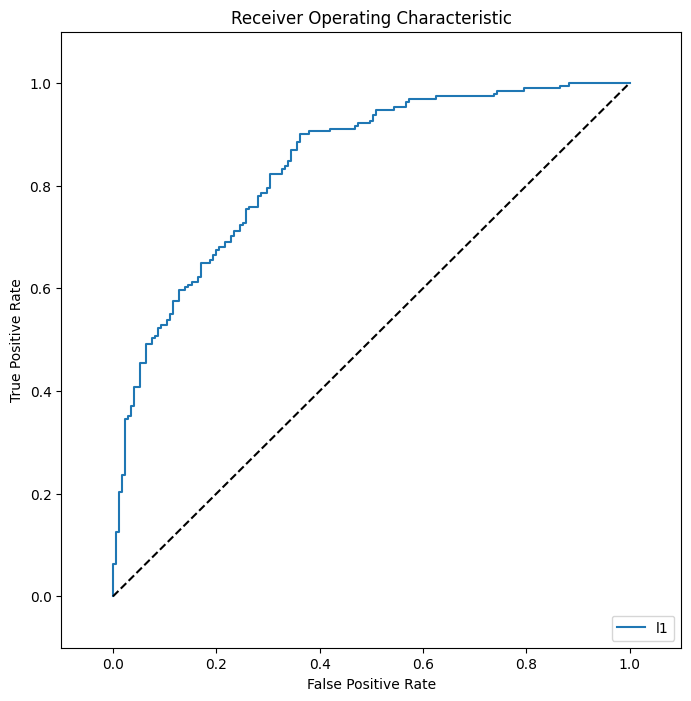

In [ ]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
##TEST
from sklearn.metrics import accuracy_score

print("\nScore for the Train dataset :", model.score(X_train, y_train))
print("Score for the Test dataset :", model.score(X_test, y_test))


Score for the Train dataset : 0.9995486346197245
Score for the Test dataset : 0.839380300664401


In [ ]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.9859871566032705

In [ ]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.839380300664401


In [ ]:
model = XGBClassifier(max_depth=1,learning_rate=0.05,n_estimators=500, reg_lambda=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
def my_plot_importance(booster, figsize, **kwargs):
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

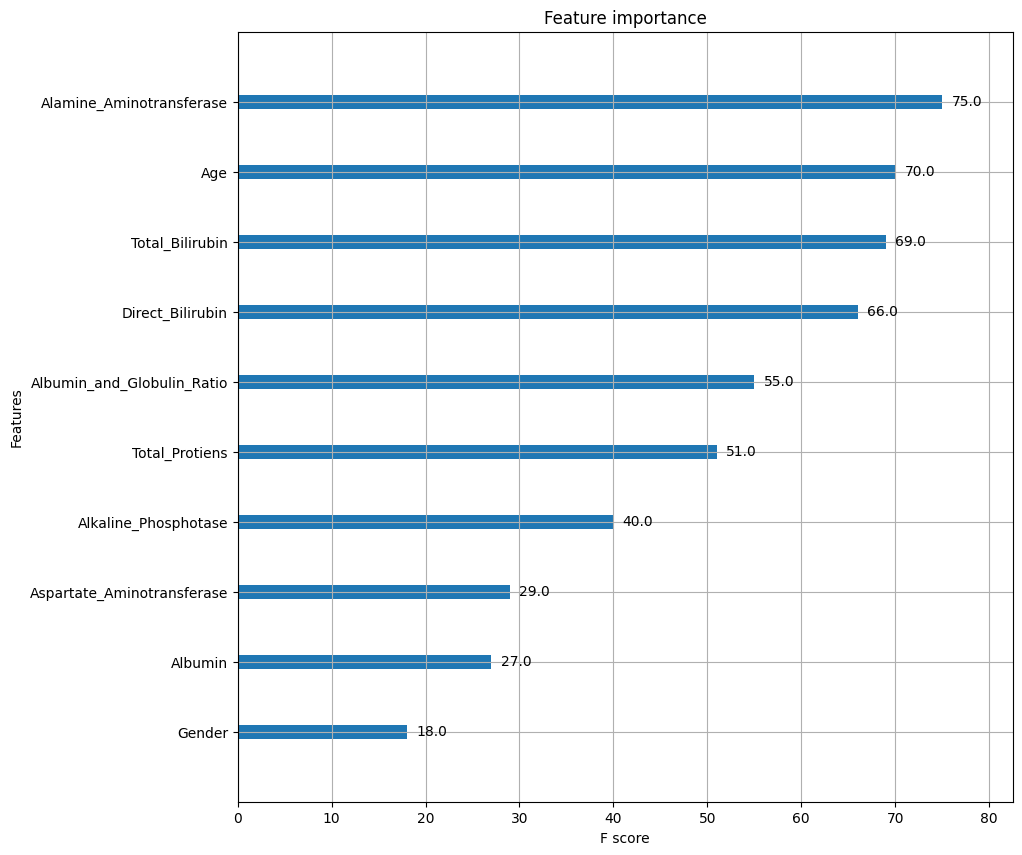

In [ ]:
my_plot_importance(model, (10,10))